In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
adults = pd.read_csv('../Data/adult.data', header=None, skipinitialspace=True,
    names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
            'marital-status', 'occupation', 'relationship', 'race', 'sex',
            'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
    )
adults

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## (b) Use the data and the numpy library to compute the following:


i. What are the 25th, 50th, and 75th pecentiles of the “education-num” field?

In [3]:
a = np.percentile(adults['education-num'],25)
b = np.percentile(adults['education-num'],50)
c = np.percentile(adults['education-num'],75)

print(f'The 25th percentile of "education-num" is {a}')
print(f'The 50th percentile of "education-num" is {b}')
print(f'The 75th percentile of "education-num" is {c}')

The 25th percentile of "education-num" is 9.0
The 50th percentile of "education-num" is 10.0
The 75th percentile of "education-num" is 12.0


ii. What is the probability that an adult makes more than $50k given that their education-num
is within the ranges defined by the above quantiles (from 0 to the 25th percentile, from the
25th to the 50th etc)?

In [4]:
education_income = adults[['education-num', 'income']]
edu_list = education_income.to_numpy() # Converts DataFrame to numpy array

#P(More than 50k given person is within 25th percentile)
total_25 = 0
_25_and50k = 0
#P(More than 50k given person is within 50th and 25th Percentile)
total_50 = 0
_50_and50k = 0
#P(More than 50k given person is within 75th and 50th Percentile)
total_75 = 0
_75_and50k = 0
#P(More than 50k given person is over the 75th Percentile)
total_big = 0
bigand50k = 0

for i in edu_list:
    
    if i[0] <= a:
        total_25 += 1
        if i[1] == '>50K':
            _25_and50k += 1
            
    elif i[0] > a and i[0] <= b:
        total_50 += 1
        if i[1] == '>50K':
            _50_and50k += 1
            
    elif i[0] > b and i[0] <= c:
        total_75 += 1
        if i[1] == '>50K':
            
            _75_and50k += 1
    elif i[0] > c:
        total_big += 1
        if i[1] == '>50K':
            bigand50k +=1
            
print(f' The probabillity of an adult making more than 50k and being within the range of the 25th percentile is {round(_25_and50k / total_25, 5)}')
print(f' The probabillity of an adult making more than 50k and being within the range of the 25th and 50th percentile is {round(_50_and50k / total_50, 5)}')
print(f' The probabillity of an adult making more than 50k and being within the range of the 50th and 75th percentile is {round(_75_and50k / total_75, 5)}')
print(f' The probabillity of an adult making more than 50k and being greater than or equal to the 75th percentile is {round(bigand50k / total_big, 5)}')

 The probabillity of an adult making more than 50k and being within the range of the 25th percentile is 0.13007
 The probabillity of an adult making more than 50k and being within the range of the 25th and 50th percentile is 0.19023
 The probabillity of an adult making more than 50k and being within the range of the 50th and 75th percentile is 0.25561
 The probabillity of an adult making more than 50k and being greater than or equal to the 75th percentile is 0.48457


iii. Plot the change in probability that a person makes more and less than $50k given their years
of education

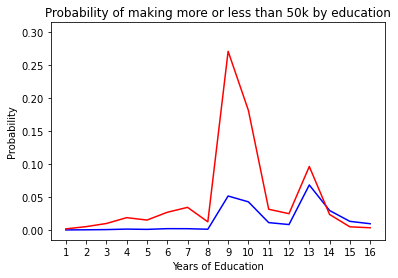

In [5]:
more = len(adults['income'] == '>50K')
less = len(adults['income'] == '<=50K')

more50 = []
less50 = []

for i in range(1,17):
    edu = adults[adults['education-num'] == i]
    edu_more = edu[edu['income'] == '>50K']
    edu_less = edu[edu['income'] == '<=50K']
    
    prob_more = len(edu_more) / more
    prob_less = len(edu_less) / less
    
    more50.append(prob_more)
    less50.append(prob_less)
    
label = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']    

xlabel = np.arange(len(label))
width = 0.3
plt.plot(xlabel, more50, width, color = 'blue')    
plt.plot(xlabel, less50, width, color = 'red')
plt.xticks(xlabel,label)
plt.ylabel('Probability')
plt.xlabel('Years of Education')
plt.title('Probability of making more or less than 50k by education')
pass

iv. What is the covariance between the number of hours worked per week and education-num?

In [6]:
x = adults['hours-per-week']
y = adults['education-num']
cov = np.cov(x,y)

print(f'The covariance between the number of hours worked per week and education-num is {round(cov[1,0], 5)}')

The covariance between the number of hours worked per week and education-num is 4.70534


v. Use the pandas.DataFrame.boxplot functionality to create a box-and-whisker plot which
illustrates the spread of hours worked among adults who make both more and less than $50k.

Text(0.5, 1.0, '')

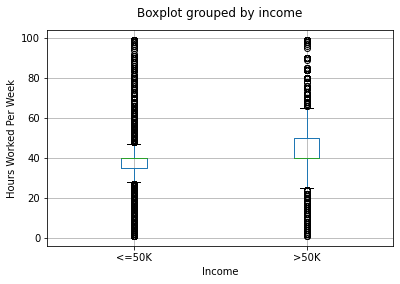

In [7]:
adults.boxplot(column=['hours-per-week'], by='income')
plt.xlabel('Income')
plt.ylabel('Hours Worked Per Week')
plt.title('')

vi. Use the pandas.DataFrame.boxplot functionality to create a box-and-whisker plot which
illustrates the spread of hours worked among adults from each native country and who make
more and less than $50k.

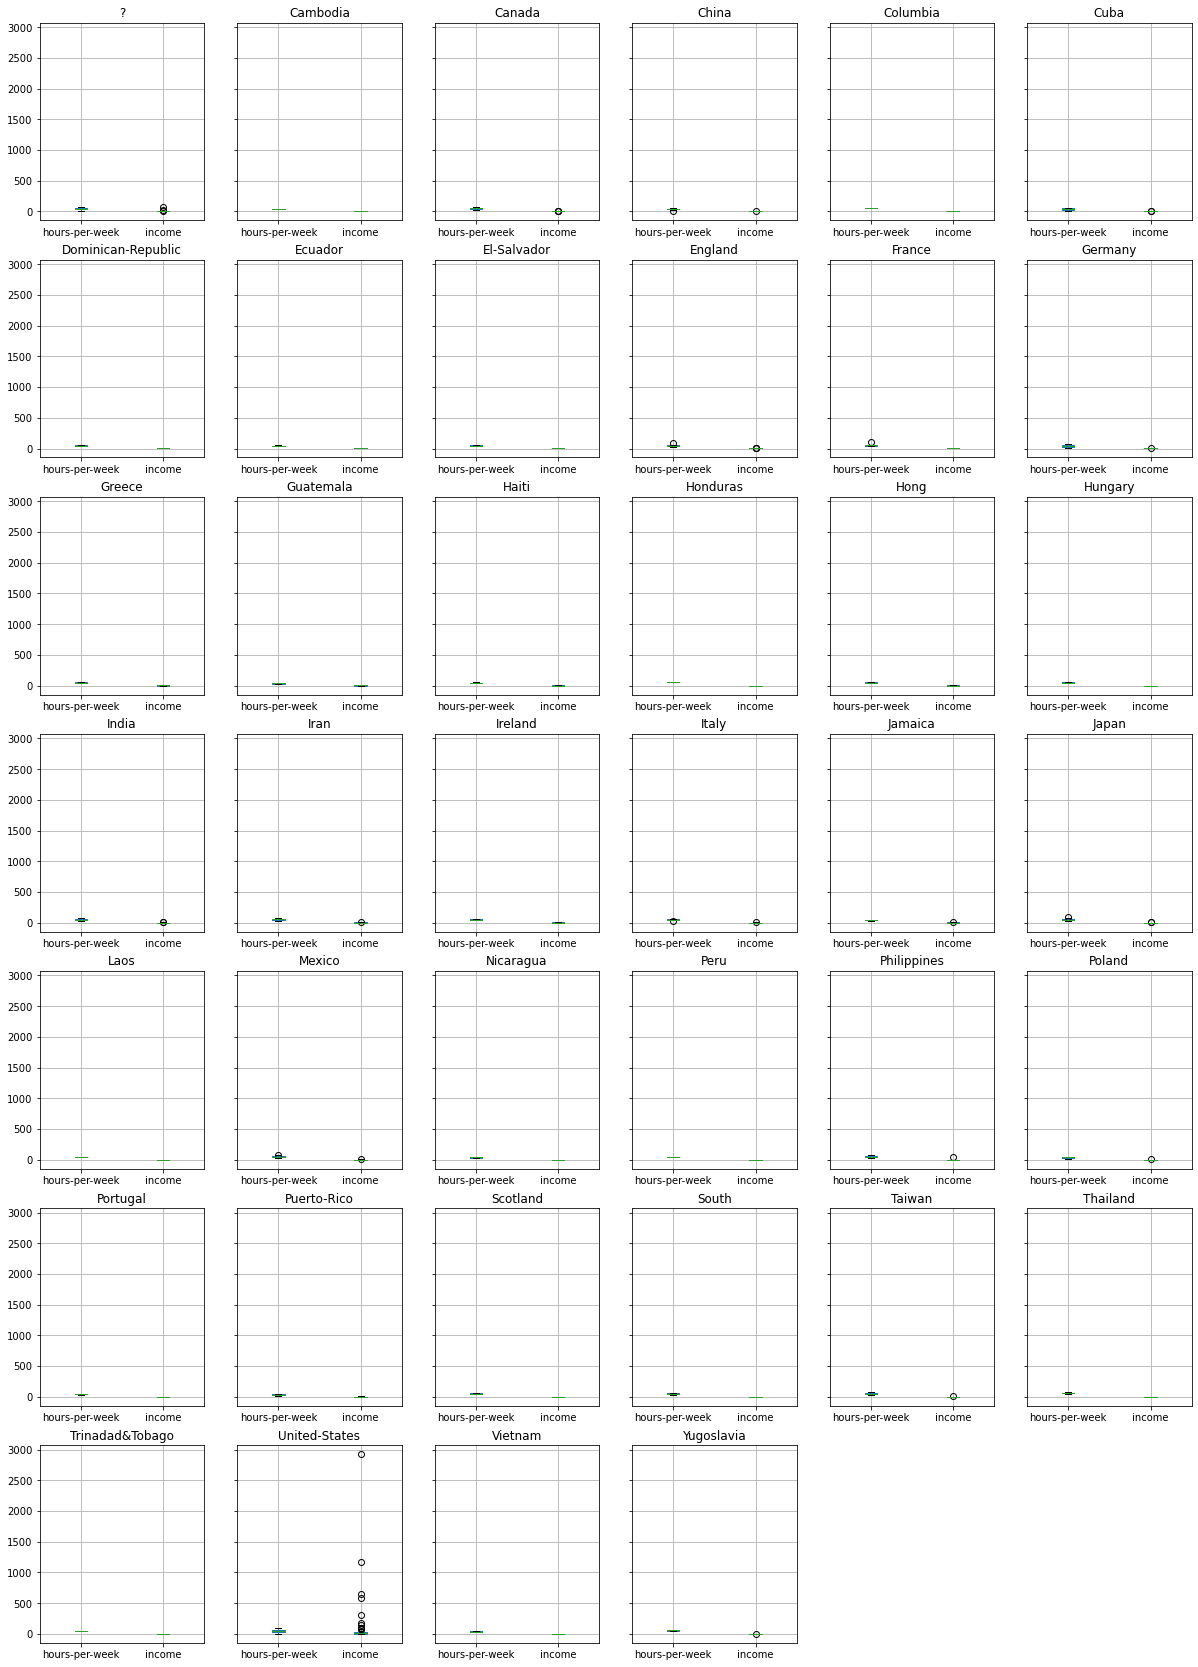

In [21]:
country = adults[['hours-per-week','income','native-country']]
greaterThan = country[country['income'] == '>50K'].groupby(['hours-per-week','native-country']).count().reset_index().groupby('native-country')
lessThan = country[country['income'] == '<=50K'].groupby(['hours-per-week','native-country']).count().reset_index().groupby('native-country')

#BOX PLOT FOR GREATER THAN 50K
greaterThan.boxplot()
plt.rcParams['figure.figsize'] = (20,50)
pass

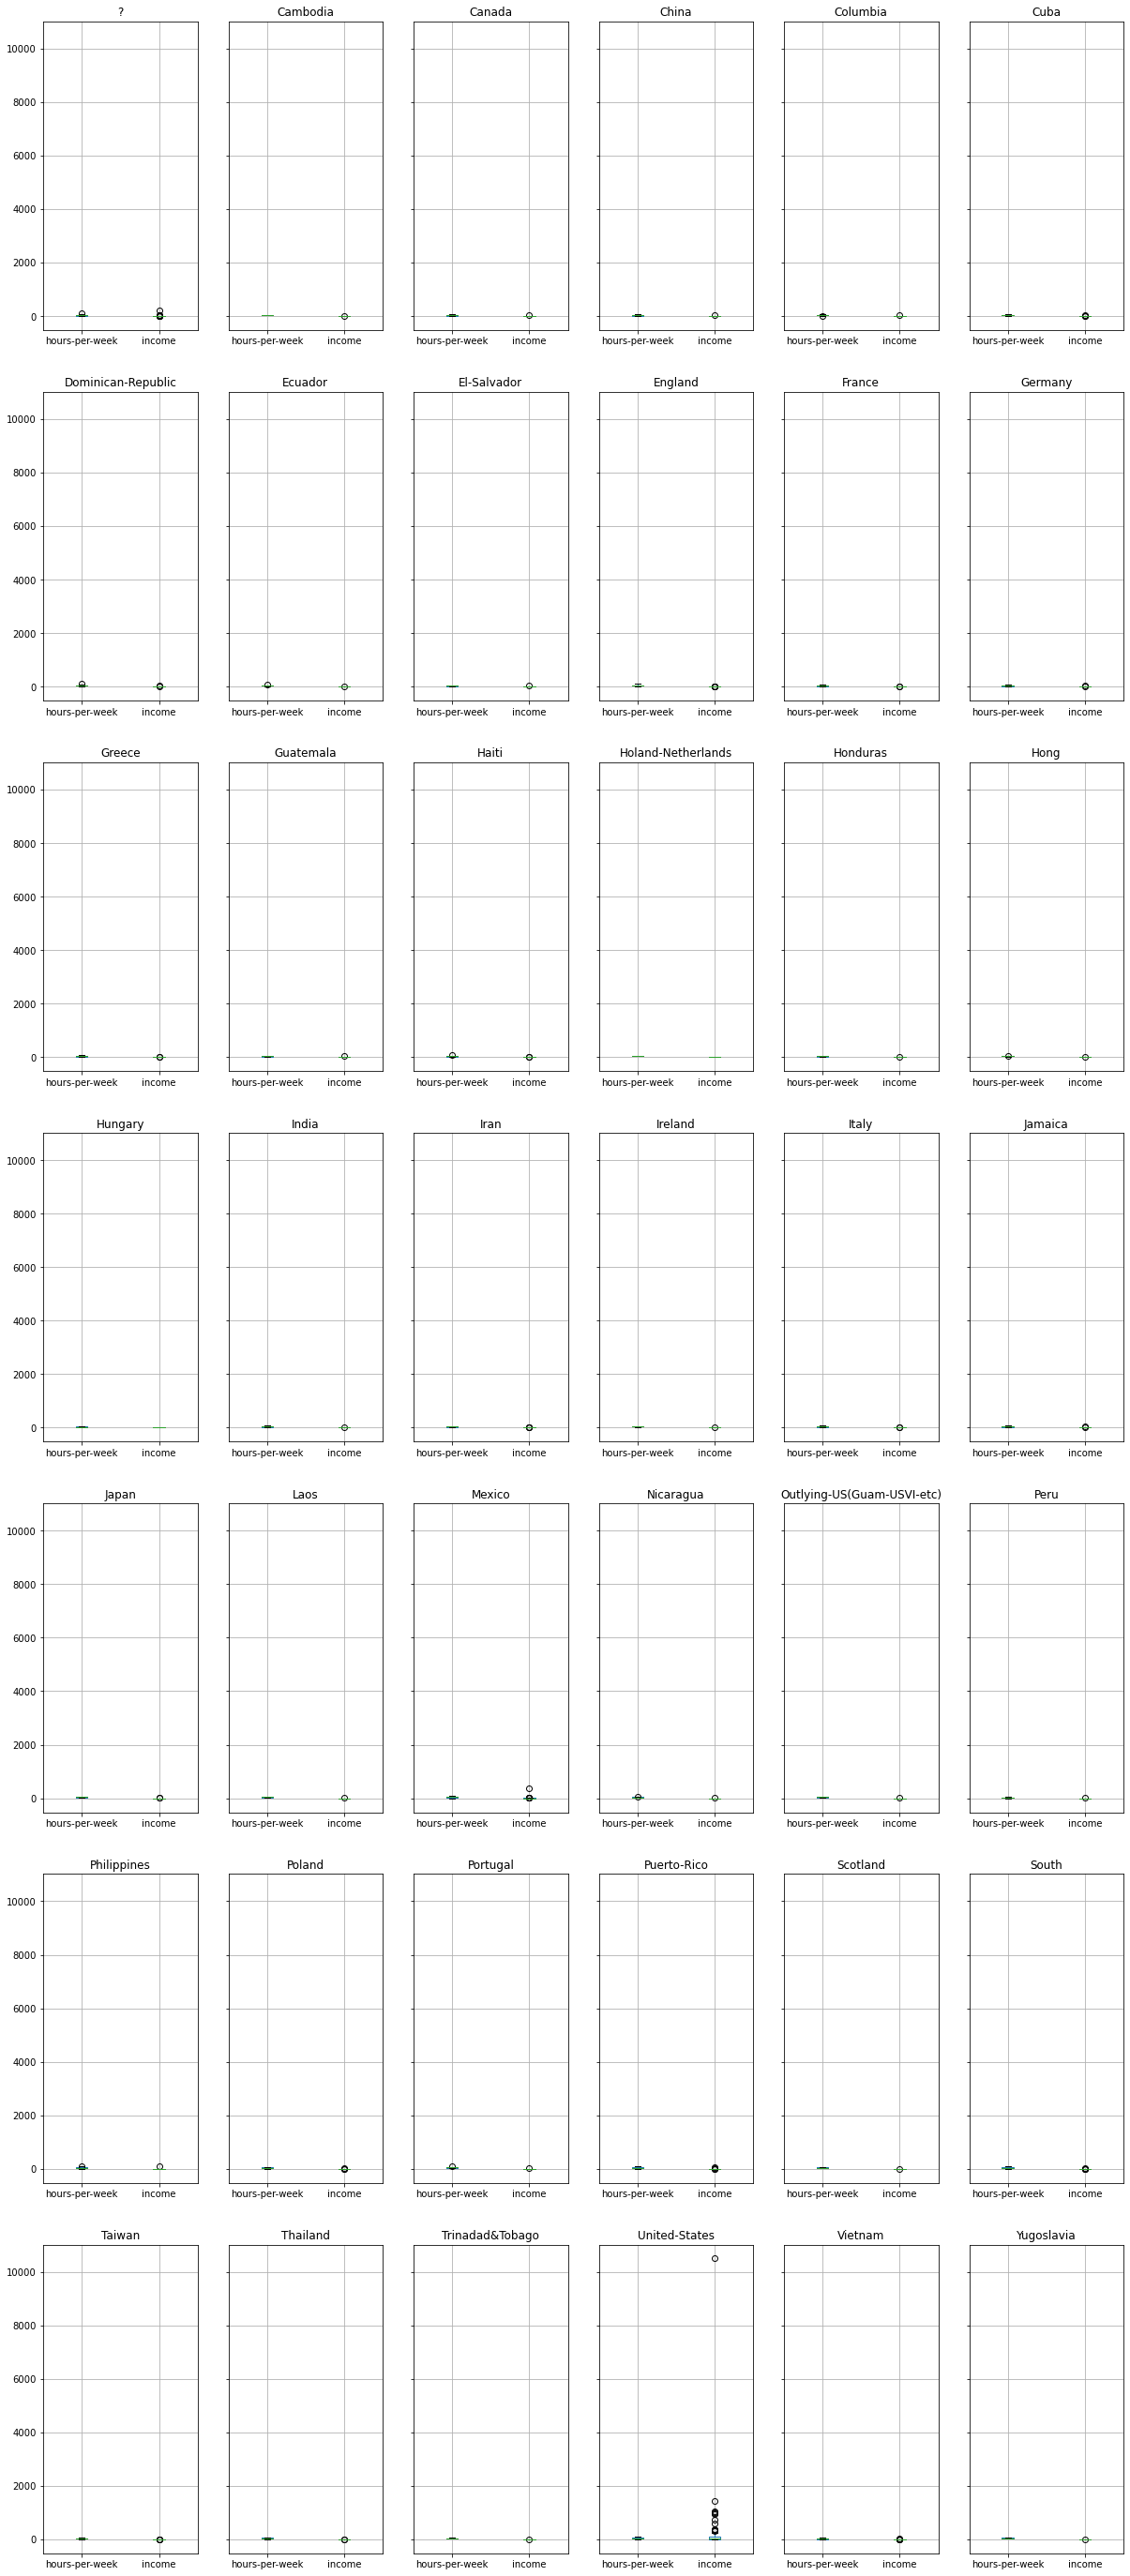

In [22]:
#BOX PLOT FOR LESS THAN 50K
lessThan.boxplot()
pass

vii. Create a table where entry (x, y) contains the conditional probability
P(A random adult has level of education x|their education-num is y).

In [10]:
education = adults['education'].unique()
edu_num = adults['education-num'].unique()

def level_given_num(a,b):
    pa = adults[adults['education'] == a]
    pb = adults[adults['education-num'] == b]
    pblength = len(pb)
    aAndb = pa[pa['education-num'] == b]
    return len(aAndb) / pblength

table = np.array(
        [[level_given_num(b,a) for a in edu_num] for b in education]
)

pd.DataFrame(table, columns = edu_num, index = education)

,13,9,7,14,5,10,12,11,4,16,15,3,6,2,1,8
Bachelors,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HS-grad,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11th,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Masters,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9th,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Some-college,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Assoc-acdm,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Assoc-voc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7th-8th,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doctorate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


viii. Create a table where entry (x, y) contains the conditional probability of having marital status
x given that they have occupation y.

In [11]:
married = adults['marital-status'].unique()
occupation = adults['occupation'].unique()

def married_occ(a,b):
    ma = adults[adults['marital-status'] == a]
    mb = adults[adults['occupation'] == b]
    mbLength = len(mb)
    AandB = ma[ma['occupation'] == b]
    return len(AandB) / mbLength

chart = np.array(
        [[married_occ(b,a) for a in occupation] for b in married]
)

pd.DataFrame(chart, columns = occupation, index = married)

,Adm-clerical,Exec-managerial,Handlers-cleaners,Prof-specialty,Other-service,Sales,Craft-repair,Transport-moving,Farming-fishing,Machine-op-inspct,Tech-support,?,Protective-serv,Armed-Forces,Priv-house-serv
Never-married,0.422016,0.196508,0.508029,0.298068,0.498027,0.361370,0.212735,0.212899,0.290744,0.285215,0.356681,0.418340,0.240370,0.666667,0.449664
Married-civ-spouse,0.261538,0.601082,0.340876,0.513527,0.219423,0.455616,0.625518,0.622417,0.578471,0.495005,0.435345,0.345632,0.590139,0.333333,0.107383
Divorced,0.217241,0.148549,0.093431,0.130193,0.152049,0.118904,0.113198,0.113338,0.064386,0.138362,0.150862,0.100380,0.121726,0.000000,0.187919
Married-spouse-absent,0.015650,0.007624,0.016788,0.011353,0.017906,0.009315,0.012686,0.011897,0.024145,0.012987,0.006466,0.015735,0.007704,0.000000,0.026846
Separated,0.038992,0.023119,0.027737,0.023913,0.057663,0.025479,0.025128,0.023168,0.018109,0.041958,0.030172,0.035811,0.024653,0.000000,0.080537
Married-AF-spouse,0.001326,0.000246,0.000000,0.000725,0.001214,0.000548,0.000732,0.000626,0.001006,0.000000,0.000000,0.001085,0.001541,0.000000,0.000000
Widowed,0.043236,0.022873,0.013139,0.022222,0.053718,0.028767,0.010002,0.015654,0.023139,0.026474,0.020474,0.083017,0.013867,0.000000,0.147651


ix. What is the conditional probability of making more or less than $50k given that a person
works in each different occupation?

In [12]:
#PROBABILITY OF MAKING MORE THAN 50K GIVEN A PERSON WORKS IN EACH DIFFERENT OCCUPATION
#THERE IS DEFINITELY AN EASIER WAY TO DO THIS BUT... IT SEEMS TO WORK

occupation_income = adults[['occupation', 'income']]
occu_list = occupation_income.to_numpy()
job = adults['occupation'].unique()

#VARIABLES TO DETERMINE THE PROBABILITY FOR EACH OCCUPATION
admtotal = 0
adm = 0
exectotal = 0
execc = 0
handtotal = 0
hand = 0
proftotal = 0
prof = 0
othertotal = 0
other = 0
saletotal = 0
sale = 0
crafttotal = 0
craft = 0
transporttotal = 0
transport = 0
farmtotal = 0
farm = 0
machinetotal = 0
machine = 0
techtotal = 0
tech = 0
unknowntotal = 0
unknown = 0
protecttotal = 0
protect = 0
armtotal = 0
arm = 0
privtotal = 0
priv = 0

#4 LOOP WITH LOTS OF IF/ELSE STATEMENTS TO READ ARRAY AND COUNT HOW MANY ADULTS IN OCCUPATION AND COUNT HOW MANY MAKE MORE THAN
# 50K PER OCCUPATION
for i in occu_list:
    
    if i[0] == 'Adm-clerical':
        admtotal += 1
        if i[1] == '>50K':
            adm += 1
            
    elif i[0] == 'Exec-managerial':
        exectotal += 1
        if i[1] == '>50K':
            execc += 1
            
    elif i[0] == 'Handlers-cleaners':
        handtotal += 1
        if i[1] == '>50K':
            hand += 1
            
    elif i[0] == 'Prof-specialty':
        proftotal += 1
        if i[1] == '>50K':
            prof += 1
            
    elif i[0] == 'Other-service':
        othertotal += 1
        if i[1] == '>50K':
            other += 1
            
    elif i[0] == 'Sales':
        saletotal += 1
        if i[1] == '>50K':
            sale += 1
            
    elif i[0] == 'Craft-repair':
        crafttotal += 1
        if i[1] == '>50K':
            craft += 1
            
    elif i[0] == 'Transport-moving':
        transporttotal += 1
        if i[1] == '>50K':
            transport += 1
    
    elif i[0] == 'Farming-fishing':
        farmtotal += 1
        if i[1] == '>50K':
            farm += 1
            
    elif i[0] == 'Machine-op-inspct':
        machinetotal += 1
        if i[1] == '>50K':
            machine += 1
    elif i[0] == 'Tech-support':
        techtotal += 1
        if i[1] == '>50K':
            tech += 1
            
    elif i[0] == '?':
        unknowntotal += 1
        if i[1] == '>50K':
            unknown += 1
    elif i[0] == 'Protective-serv':
        protecttotal += 1
        if i[1] == '>50K':
            protect += 1
            
    elif i[0] == 'Armed-Forces':
        armtotal += 1
        if i[1] == '>50K':
            arm += 1
    elif i[0] == 'Priv-house-serv':
        privtotal += 1
        if i[1] == '>50K':
            priv += 1
            

In [13]:
#OUTPUT AND STATEMENTS FOR EACH OCCUPATION
print(f'The probability a person makes more than 50k with the occupation {job[0]} is {round(adm / admtotal,5)}')
print(f'The probability a person makes more than 50k with the occupation {job[1]} is {round(execc / exectotal,5)}')
print(f'The probability a person makes more than 50k with the occupation {job[2]} is {round(hand / handtotal,5)}')
print(f'The probability a person makes more than 50k with the occupation {job[3]} is {round(prof / proftotal,5)}')
print(f'The probability a person makes more than 50k with the occupation {job[4]} is {round(other / othertotal,5)}')
print(f'The probability a person makes more than 50k with the occupation {job[5]} is {round(sale / saletotal,5)}')
print(f'The probability a person makes more than 50k with the occupation {job[6]} is {round(craft / crafttotal,5)}')
print(f'The probability a person makes more than 50k with the occupation {job[7]} is {round(transport / transporttotal,5)}')
print(f'The probability a person makes more than 50k with the occupation {job[8]} is {round(farm / farmtotal,5)}')
print(f'The probability a person makes more than 50k with the occupation {job[9]} is {round(machine / machinetotal,5)}')
print(f'The probability a person makes more than 50k with the occupation {job[10]} is {round(tech / techtotal,5)}')
print(f'The probability a person makes more than 50k with the occupation {job[11]} is {round(unknown / unknowntotal,5)}')
print(f'The probability a person makes more than 50k with the occupation {job[12]} is {round(protect / protecttotal,5)}')
print(f'The probability a person makes more than 50k with the occupation {job[13]} is {round(arm / armtotal,5)}')
print(f'The probability a person makes more than 50k with the occupation {job[14]} is {round(priv / privtotal,5)}')

The probability a person makes more than 50k with the occupation Adm-clerical is 0.13448
The probability a person makes more than 50k with the occupation Exec-managerial is 0.48401
The probability a person makes more than 50k with the occupation Handlers-cleaners is 0.06277
The probability a person makes more than 50k with the occupation Prof-specialty is 0.44903
The probability a person makes more than 50k with the occupation Other-service is 0.04158
The probability a person makes more than 50k with the occupation Sales is 0.26932
The probability a person makes more than 50k with the occupation Craft-repair is 0.22664
The probability a person makes more than 50k with the occupation Transport-moving is 0.20038
The probability a person makes more than 50k with the occupation Farming-fishing is 0.11569
The probability a person makes more than 50k with the occupation Machine-op-inspct is 0.12488
The probability a person makes more than 50k with the occupation Tech-support is 0.30496
The p

x. Plot the change in probability that a person makes more and less than $50k given the amount
that they work per week.

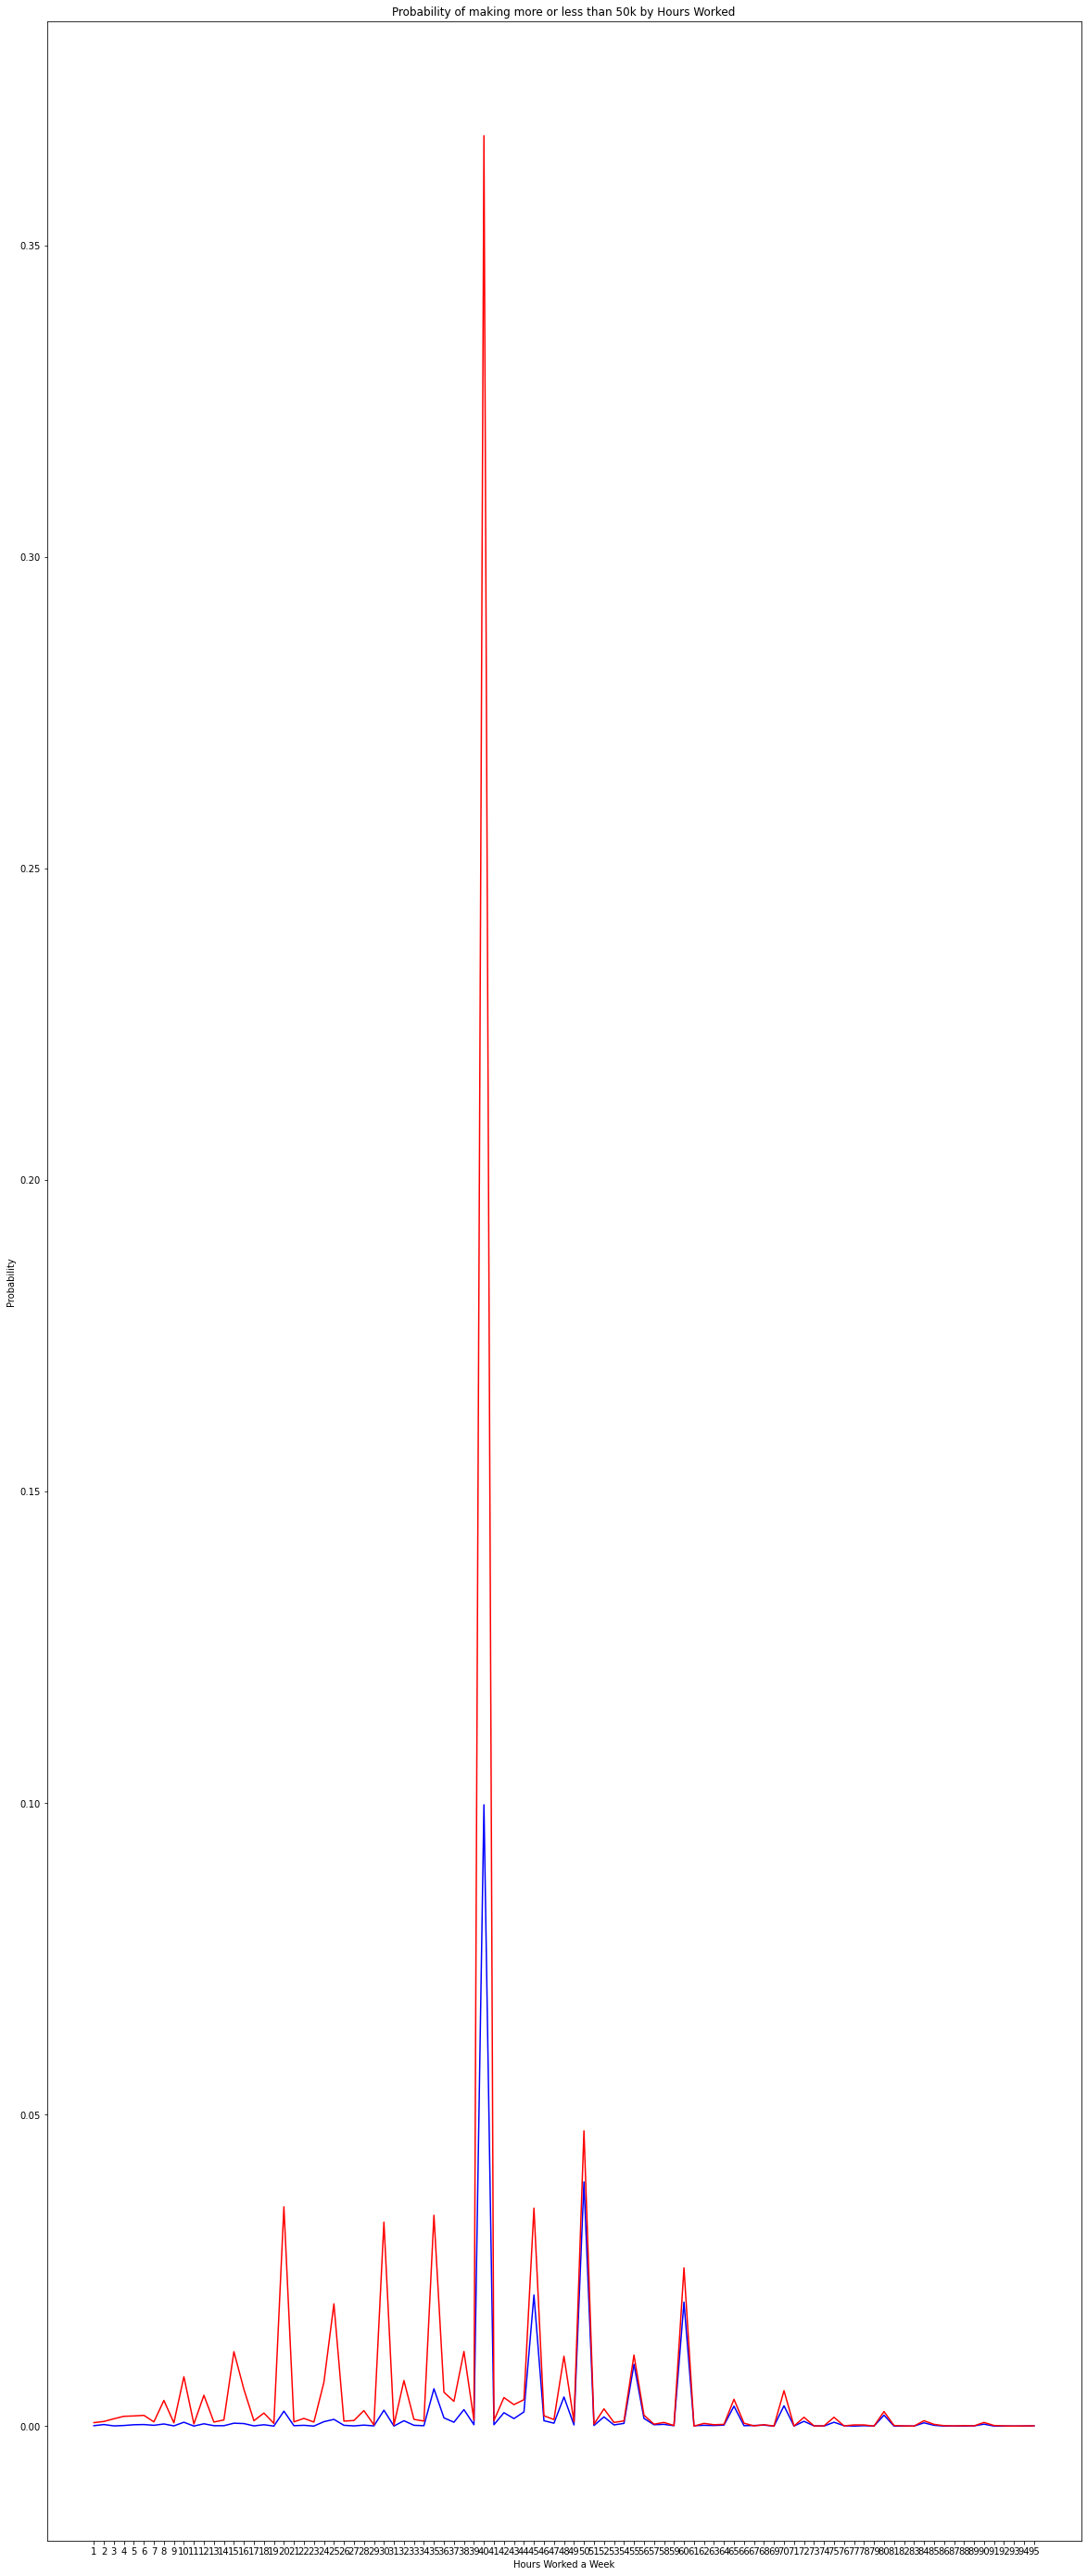

In [27]:
more = len(adults['income'] == '>50K')
less = len(adults['income'] == '<=50K')

more50 = []
less50 = []

for i in range(1,96):
    edu = adults[adults['hours-per-week'] == i]
    edu_more = edu[edu['income'] == '>50K']
    edu_less = edu[edu['income'] == '<=50K']
    
    prob_more = len(edu_more) / more
    prob_less = len(edu_less) / less
    
    more50.append(prob_more)
    less50.append(prob_less)
    
label = range(1,96)  

xlabel = np.arange(len(label))
width = 0.3
plt.plot(xlabel, more50, width, color = 'blue', )    
plt.plot(xlabel, less50, width, color = 'red', )
plt.xticks(xlabel,label)
plt.ylabel('Probability')
plt.xlabel('Hours Worked a Week')
plt.title('Probability of making more or less than 50k by Hours Worked')
pass

## 3. Answer the following questions using the fundamentals of probability.


(a) If A and B are independent, show that A¯ and B, A¯ and B, A¯ and B¯ are independent.

$A \cap B $ is indepedent, then 
$A \cap B = P(A)P(B)$ <br>
Show that $P(A^* \cap B) = P(A^* \cap B)$, <br>

\begin{align}
P(A^* \cap B) = P(B) - P(A \cap B) \\
=P(B) - P(A)P(B) \\
= P(B)(1-P(A)) \\
= P(B)P(A^*)
\end{align}

Therefore, we can say that $A^*$ and $B$ are independent as well as $A$ and $B^*$
<br>
<br>
Show that $P(A^* \cap B^*) = P(A^*)P(B^*)$ <br>

\begin{align}
P(A^* \cap B^*) = P(A^* \cup B^*) \\
= 1 - P(A \cup B) \\
= 1 - (P(A) + P(B) - P(A \cap B)) \\
= 1 - (P(A) + P(B) - P(A)P(B)) \\
= 1 - (1 - P(A^*) + 1 - P(B^*) - ((1 - P(A^*))(1 - P(B^*))) \\
= 1 - (1 - P(A^*)P(B^*)) \\
= P(A^*)P(B^*)
\end{align}
Therefore, we can say that $A^*$ and $B^*$ are independent


(b) Suppose we send 30% of our products to company A and 70% of our products to company B.
Company A reports that 5% of our products are defective and company B reports that 4% of
our products are defective. For each probability below, compute the precise value by hand, and
also write a short Python script to simulate the above scenario and estimate each probability by
empirically examining the rates of each event.

Hand written portion: <br>
<br>
\begin{align}
P(A) = 0.3 \\
P(B) = 0.7 \\
P(D_A) = 0.05 \\
P(D_B) = 0.04 \\
\\
P(A \cap D_A) = (0.3)(0.05) = 0.015 \\
P(A \cap D_A^*) = (0.3)(0.95) = 0.285 \\
P(B \cap D_B) = (0.7)(0.04) = 0.028 \\
P(B \cap D_B^*) = (0.7)(0.96) = 0.672\\
\end{align}


In [26]:
#CODE PORTION OF 3b
sample = 30

prob_A = 0.3
prob_B = 0.7


prob_AD = prob_A * (0.05)
prob_AND = prob_A * (0.95)
prob_BD = prob_B * (0.04)
prob_BND = prob_B * (0.96)

products = np.random.choice(['Company A - Defective', 'Company A - NonDefective', 'Company B - Defective','Company B - NonDefective'],
                           sample, p = [prob_AD, prob_AND, prob_BD, prob_BND])
trial = pd.DataFrame(products)
print(f'Probability of Comapny A and Defective {prob_AD}')
print(f'Probability of Company A and NOT Defective {prob_AND}')
print(f'Probability of Comapny B and Defective {prob_BD}')
print(f'Probability of Company B and NOT Defective {prob_BND}')
print(trial)

Probability of Comapny A and Defective 0.015
Probability of Company A and NOT Defective 0.285
Probability of Comapny B and Defective 0.027999999999999997
Probability of Company B and NOT Defective 0.6719999999999999
                           0
0   Company A - NonDefective
1   Company A - NonDefective
2   Company B - NonDefective
3   Company A - NonDefective
4   Company B - NonDefective
5   Company B - NonDefective
6   Company B - NonDefective
7   Company A - NonDefective
8   Company A - NonDefective
9   Company B - NonDefective
10  Company B - NonDefective
11  Company A - NonDefective
12  Company B - NonDefective
13  Company B - NonDefective
14  Company B - NonDefective
15  Company B - NonDefective
16     Company B - Defective
17  Company B - NonDefective
18  Company A - NonDefective
19  Company A - NonDefective
20  Company B - NonDefective
21  Company B - NonDefective
22  Company A - NonDefective
23  Company B - NonDefective
24  Company A - NonDefective
25  Company B - NonDefective
2

(c) Show that for events A and B that P(A|B) > P(A) implies P(B|A) > P(B).

\begin{align}
P(A|B) > P(A) \\
P(B) \cdot \frac{P(A \cap B)}{P(B)} > P(A) \cdot P(B) \\
\frac{P(A \cap B)}{P(A)} > \frac{P(A) \cdot P(B)}{P(A)} \\
\frac{P(B \cap A)}{P(A)} > P(B) \\
P(B|A) > P(B)
\end{align}